In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('Iris.csv')
df=df.drop(columns={"Id"})
label=df['Species'].unique()
target=dict(zip(label,range(len(label))))
df['Species']=df['Species'].map(target)
df['Species']=df['Species'].astype(int)
X,Y=np.array(df.iloc[:,:-1]),np.array(df.iloc[:,-1])

In [95]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.15,random_state=456)
xtrain,ytrain=torch.tensor(xtrain,dtype=torch.float32),torch.tensor(ytrain,dtype=torch.int64)
xtest,ytest=torch.tensor(xtest,dtype=torch.float32),torch.tensor(ytest,dtype=torch.int64)
dataset=TensorDataset(xtrain,ytrain)
dataloader=DataLoader(dataset,batch_size=8,shuffle=True)

In [45]:
class AutoEncoder(nn.Module):
    def __init__(Self,inp_dim=4,encoding_dim=2):
        super().__init__()
        Self.encode=nn.Sequential(nn.Linear(inp_dim,2*inp_dim),nn.ReLU(),
                                  nn.Linear(2*inp_dim,inp_dim),nn.ReLU(),
                                 nn.Linear(inp_dim,encoding_dim))
        Self.decode=nn.Sequential(nn.Linear(encoding_dim,inp_dim),nn.ReLU(),
                                  nn.Linear(inp_dim,2*inp_dim),nn.ReLU(),
                                 nn.Linear(2*inp_dim,inp_dim))
    def forward(Self,x):
        x=Self.decode(Self.encode(x))
        return x
    def encoder(Self,x):
        x=Self.encode(x)
        return x        
Model=AutoEncoder()
loss_function=nn.MSELoss()
optimizer=optim.Adam(Model.parameters(),lr=0.001)

In [55]:
def train(epochs):
    for epoch in range(epochs):
        total_loss=0
        for i,(data,target) in enumerate(dataloader):
            optimizer.zero_grad()
            output=Model.forward(data)
            loss=loss_function(output,data)
            loss.backward()
            optimizer.step()
            total_loss+=loss.item()
        print(f"{epoch}:Total_Loss at Epoch {epoch} is:{round(total_loss,4)}")
train(100)

0:Total_Loss at Epoch 0 is:198.4821
1:Total_Loss at Epoch 1 is:166.4811
2:Total_Loss at Epoch 2 is:122.6891
3:Total_Loss at Epoch 3 is:73.0125
4:Total_Loss at Epoch 4 is:31.0216
5:Total_Loss at Epoch 5 is:13.386
6:Total_Loss at Epoch 6 is:11.3173
7:Total_Loss at Epoch 7 is:10.6255
8:Total_Loss at Epoch 8 is:10.4756
9:Total_Loss at Epoch 9 is:10.2232
10:Total_Loss at Epoch 10 is:10.2192
11:Total_Loss at Epoch 11 is:10.1305
12:Total_Loss at Epoch 12 is:10.0765
13:Total_Loss at Epoch 13 is:10.0332
14:Total_Loss at Epoch 14 is:9.9587
15:Total_Loss at Epoch 15 is:9.8558
16:Total_Loss at Epoch 16 is:9.8331
17:Total_Loss at Epoch 17 is:9.885
18:Total_Loss at Epoch 18 is:9.7663
19:Total_Loss at Epoch 19 is:9.7184
20:Total_Loss at Epoch 20 is:9.6786
21:Total_Loss at Epoch 21 is:9.5772
22:Total_Loss at Epoch 22 is:9.6128
23:Total_Loss at Epoch 23 is:9.5551
24:Total_Loss at Epoch 24 is:9.4914
25:Total_Loss at Epoch 25 is:9.4201
26:Total_Loss at Epoch 26 is:9.3511
27:Total_Loss at Epoch 27 is:9.42

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


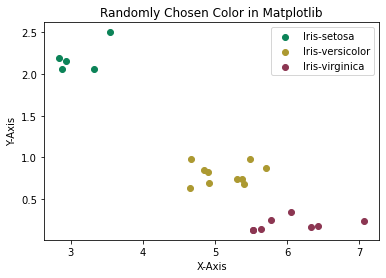

In [116]:
import random
encoded=Model.encode(xtest).detach()
def plot(data,keys):
    random_color = (random.random(), random.random(), random.random())
    x,y=data[:,0],data[:,1]
    plt.scatter(x,y,c=random_color,label=keys)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.title('Randomly Chosen Color in Matplotlib')
    plt.legend()
for keys in target:
    plot(encoded[ytest==target[keys]],keys)